# TP2: Random Forest
___
Lucas Nahuel Raimondi

Manuel Davila

Dolores Levi

# Imports

In [75]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer, TfidfVectorizer


from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import precision_score, recall_score, accuracy_score,f1_score#, precision_recall_curve, roc_curve,
from sklearn.metrics import confusion_matrix, classification_report

from sklearn.pipeline import make_pipeline

import matplotlib.pyplot as plt
import seaborn as sns

In [76]:
!wget https://raw.githubusercontent.com/dlevi150/7506R-2C2023-GRUPO33/main/TP2/datasets/train.csv

--2023-12-07 22:47:18--  https://raw.githubusercontent.com/dlevi150/7506R-2C2023-GRUPO33/main/TP2/datasets/train.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 72229641 (69M) [text/plain]
Saving to: ‘train.csv.4’

train.csv.4         100%[===================>]  68.88M  86.3MB/s    in 0.8s    

2023-12-07 22:47:19 (86.3 MB/s) - ‘train.csv.4’ saved [72229641/72229641]



In [77]:
!wget https://raw.githubusercontent.com/dlevi150/7506R-2C2023-GRUPO33/main/TP2/datasets/test.csv

--2023-12-07 22:47:19--  https://raw.githubusercontent.com/dlevi150/7506R-2C2023-GRUPO33/main/TP2/datasets/test.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.111.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 11054515 (11M) [text/plain]
Saving to: ‘test.csv.4’

test.csv.4          100%[===================>]  10.54M  31.6MB/s    in 0.3s    

2023-12-07 22:47:20 (31.6 MB/s) - ‘test.csv.4’ saved [11054515/11054515]



# Preprocesamiento

In [78]:
df = pd.read_csv('train.csv')
df_filtrado = df.copy()

In [79]:
df_filtrado['sentimiento_encodeado'] = df_filtrado['sentimiento'].map({'positivo': 1, 'negativo': 0})
df_filtrado

,ID,review_es,sentimiento,sentimiento_encodeado
0,0,Uno de los otros críticos ha mencionado que de...,positivo,1
1,1,Una pequeña pequeña producción.La técnica de f...,positivo,1
2,2,Pensé que esta era una manera maravillosa de p...,positivo,1
3,3,"Básicamente, hay una familia donde un niño peq...",negativo,0
4,4,"El ""amor en el tiempo"" de Petter Mattei es una...",positivo,1
...,...,...,...,...
49995,49995,Pensé que esta película hizo un buen trabajo a...,positivo,1
49996,49996,"Mala parcela, mal diálogo, mala actuación, dir...",negativo,0
49997,49997,Soy católica enseñada en escuelas primarias pa...,negativo,0
49998,49998,Voy a tener que estar en desacuerdo con el com...,negativo,0


In [80]:
df_filtrado['sentimiento_encodeado'].value_counts()

1    25000
0    25000
Name: sentimiento_encodeado, dtype: int64

## Deteccion de Lenguajes

In [81]:
!pip install langdetect

In [82]:
from langdetect import detect

for i, row in df_filtrado.iterrows():
  df_filtrado.loc[i,'lang'] = detect(row.review_es)

In [83]:
df_filtrado.query('lang != "es"')
df_filtrado = df_filtrado.loc[df_filtrado.lang == 'es']

# Entrenamiento

In [84]:
x_train, x_test, y_train, y_test = train_test_split(df_filtrado.review_es,
                                                    df_filtrado.sentimiento_encodeado,
                                                    test_size = 0.3,
                                                    random_state = 0,
                                                    shuffle=True)

In [101]:
tf_idf = TfidfVectorizer(ngram_range = (1,2),
                         min_df = 0.01,
                         max_df = 0.5,
                         lowercase = True)

x_train_vectorizado = tf_idf.fit_transform(x_train)
x_test_vectorizado = tf_idf.transform(x_test)

In [102]:
random_forest_model = RandomForestClassifier()
#Entrenamos el modelo
model = random_forest_model.fit(X = x_train_vectorizado, y = y_train)

In [103]:
y_pred = model.predict(x_test_vectorizado)
#Valores Predichos
y_pred

array([1, 1, 0, ..., 1, 1, 0])

Text(50.722222222222214, 0.5, 'True')

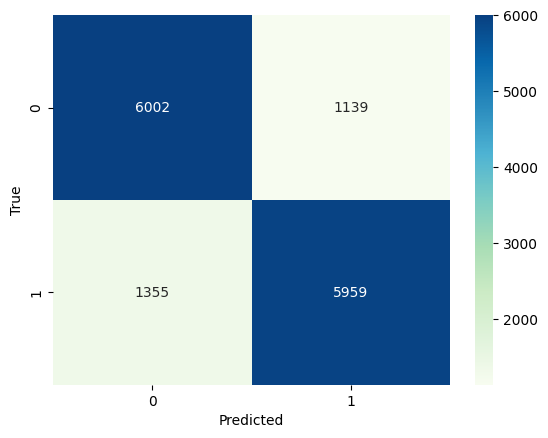

In [104]:
tabla=confusion_matrix(y_test, y_pred)

#Grafico la matriz de confusión
sns.heatmap(tabla,cmap='GnBu',annot=True,fmt='g')
plt.xlabel('Predicted')
plt.ylabel('True')

In [105]:
accuracy=accuracy_score(y_test,y_pred)
recall=recall_score(y_test,y_pred)
f1=f1_score(y_test,y_pred)
precision=precision_score(y_test,y_pred)

print("Accuracy: "+str(accuracy))
print("Recall: "+str(recall))
print("Precision: "+str(precision))
print("f1 score: "+str(f1))

Accuracy: 0.8274645451400899
Recall: 0.8147388569866011
Precision: 0.8395322626091857
f1 score: 0.8269497640854844


In [106]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.82      0.84      0.83      7141
           1       0.84      0.81      0.83      7314

    accuracy                           0.83     14455
   macro avg       0.83      0.83      0.83     14455
weighted avg       0.83      0.83      0.83     14455



# Prediccion

In [107]:
df_test = pd.read_csv("test.csv")

In [108]:
df_test_filtrado = df_test.copy()

In [109]:
test_vectorizado = tf_idf.transform(df_test_filtrado.review_es)
test_pred = model.predict(test_vectorizado)

In [110]:
test_pred

array([0, 1, 0, ..., 0, 0, 0])

In [111]:
df_test_ids = df_test['ID']

In [112]:
data = {'ID': df_test_ids, 'sentimiento': test_pred}
df_final = pd.DataFrame(data)

In [113]:
df_final['sentimiento'] = df_final['sentimiento'].map({1: 'positivo', 0: 'negativo'})

In [114]:
df_final.to_csv('submission.csv', index=False)